In [523]:
#u20464348 Jaimen Govender

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import os
import random

In [524]:
# Step 1 : Data Preprocessing
df = pd.read_csv('Almond.csv')
df = df.drop(df.columns[0], axis=1)
print(df.head(10))


   Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0                  NaN          227.940628         127.759132  22619.0   
1                  NaN          234.188126         128.199509  23038.0   
2                  NaN          229.418610         125.796547  22386.5   
3                  NaN          232.763153         125.918808  22578.5   
4                  NaN          230.150742         107.253448  19068.0   
5                  NaN          231.914429         107.759789  19335.0   
6                  NaN          226.371048         106.479408  18583.5   
7                  NaN          226.186142         102.623077  18069.5   
8           413.477173                 NaN         138.190536  41492.0   
9           418.210327                 NaN         129.659897  40630.5   

     Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
0   643.813269        NaN  0.973384     1.458265           NaN           NaN   
1   680.984841        NaN

In [525]:
# count number of rows with missing values
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

missing_values_count = df.isnull().any(axis=1).sum()
print("number of rows with missing values: " , missing_values_count)

Number of rows in the dataset: 2803
number of rows with missing values:  2803


In [526]:
# Calculate the mean for each feature for each type of almond
mean_features_by_type = df.groupby('Type').mean()
print(mean_features_by_type)


         Length (major axis)  Width (minor axis)  Thickness (depth)  \
Type                                                                  
MAMRA             321.807244          171.563531         100.804977   
REGULAR           265.595645          161.198807         112.327780   
SANORA            283.245347          180.122669         115.371740   

                 Area   Perimeter  Roundness  Solidity  Compactness  \
Type                                                                  
MAMRA    27854.953912  806.454241   0.403849  0.937582     2.102145   
REGULAR  24271.046926  688.490002   0.510044  0.965408     1.680014   
SANORA   27383.594380  736.371272   0.500045  0.964464     1.694014   

         Aspect Ratio  Eccentricity    Extent  Convex hull(convex area)  
Type                                                                     
MAMRA        1.923085      0.846328  0.707280              29593.051447  
REGULAR      1.682657      0.800094  0.736946              25109.8

In [527]:
# Fill missing values within each type group with mean
if 'Type' not in df.columns:
    raise ValueError("The 'Type' column is missing from the DataFrame.")

df_filled = df.groupby('Type').transform(lambda x: x.fillna(x.mean()))
df_filled['Type'] = df['Type']
print(df.head(10))

   Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0                  NaN          227.940628         127.759132  22619.0   
1                  NaN          234.188126         128.199509  23038.0   
2                  NaN          229.418610         125.796547  22386.5   
3                  NaN          232.763153         125.918808  22578.5   
4                  NaN          230.150742         107.253448  19068.0   
5                  NaN          231.914429         107.759789  19335.0   
6                  NaN          226.371048         106.479408  18583.5   
7                  NaN          226.186142         102.623077  18069.5   
8           413.477173                 NaN         138.190536  41492.0   
9           418.210327                 NaN         129.659897  40630.5   

     Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
0   643.813269        NaN  0.973384     1.458265           NaN           NaN   
1   680.984841        NaN

In [528]:

# Print mean for each feature
mean_features_by_type = df_filled.groupby('Type').mean()
print(mean_features_by_type)

         Length (major axis)  Width (minor axis)  Thickness (depth)  \
Type                                                                  
MAMRA             321.807244          171.563531         100.804977   
REGULAR           265.595645          161.198807         112.327780   
SANORA            283.245347          180.122669         115.371740   

                 Area   Perimeter  Roundness  Solidity  Compactness  \
Type                                                                  
MAMRA    27854.953912  806.454241   0.403849  0.937582     2.102145   
REGULAR  24271.046926  688.490002   0.510044  0.965408     1.680014   
SANORA   27383.594380  736.371272   0.500045  0.964464     1.694014   

         Aspect Ratio  Eccentricity    Extent  Convex hull(convex area)  
Type                                                                     
MAMRA        1.923085      0.846328  0.707280              29593.051447  
REGULAR      1.682657      0.800094  0.736946              25109.8

In [529]:


print(df.columns)


Index(['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)',
       'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness',
       'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)',
       'Type'],
      dtype='object')


In [530]:

label_encoder = LabelEncoder()
df_filled['Type_encoded'] = label_encoder.fit_transform(df_filled['Type'])

# Calculate the correlation matrix between each feature and the encoded outcome
correlation_matrix = df_filled.drop(columns=['Type']).corrwith(df_filled['Type_encoded'])

# Display the correlation
print(correlation_matrix)

Length (major axis)        -0.292310
Width (minor axis)          0.142113
Thickness (depth)           0.380520
Area                       -0.013641
Perimeter                  -0.123801
Roundness                   0.384091
Solidity                    0.277235
Compactness                -0.209883
Aspect Ratio               -0.741026
Eccentricity               -0.739871
Extent                      0.191447
Convex hull(convex area)   -0.034985
Type_encoded                1.000000
dtype: float64


                          Outcome_0  Outcome_1  Outcome_2
Length (major axis)        0.414558  -0.322176  -0.092660
Width (minor axis)         0.015626  -0.278420   0.261648
Thickness (depth)         -0.393367   0.126338   0.266527
Area                       0.068883  -0.114270   0.045082
Perimeter                  0.191728  -0.168805  -0.023136
Roundness                 -0.466282   0.266195   0.199989
Solidity                  -0.325558   0.170097   0.155325
Compactness                0.246369  -0.128580  -0.117685
Aspect Ratio               0.783752  -0.281504  -0.501375
Eccentricity               0.771895  -0.259757  -0.511203
Extent                    -0.257548   0.183030   0.074616
Convex hull(convex area)   0.094123  -0.127719   0.033300
Outcome_0                  1.000000  -0.496528  -0.502944
Outcome_1                 -0.496528   1.000000  -0.500522
Outcome_2                 -0.502944  -0.500522   1.000000


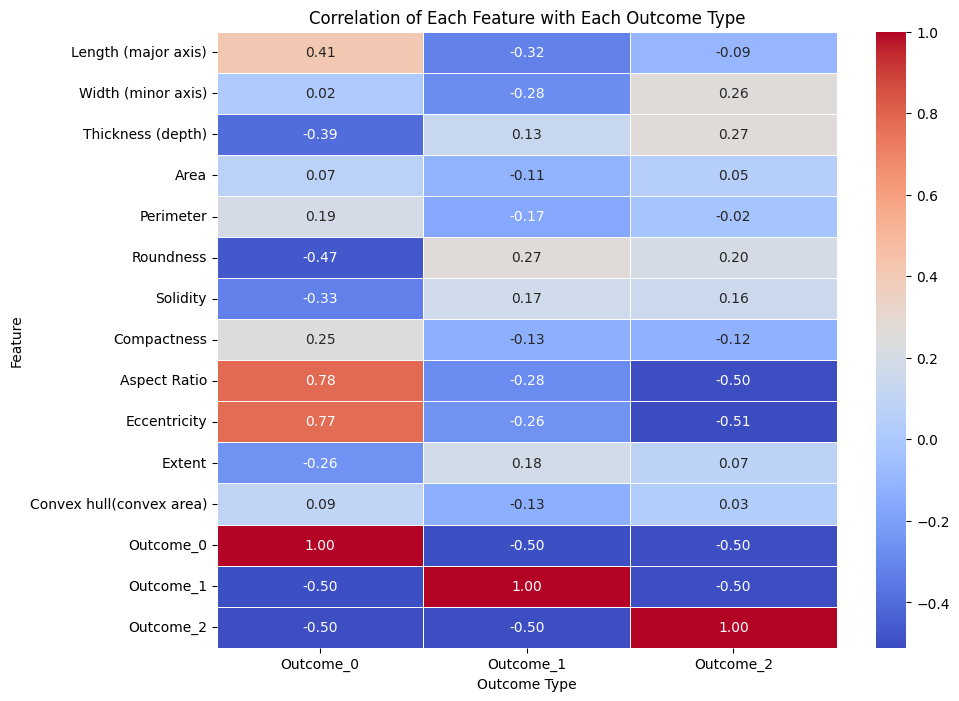

In [531]:
outcomes = pd.get_dummies(df_filled['Type_encoded'], prefix='Outcome')

df_with_outcomes = pd.concat([df_filled.drop(columns=['Type', 'Type_encoded']), outcomes], axis=1)

correlation_matrix = df_with_outcomes.corr().loc[:, outcomes.columns]

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Each Feature with Each Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Feature')
plt.show()

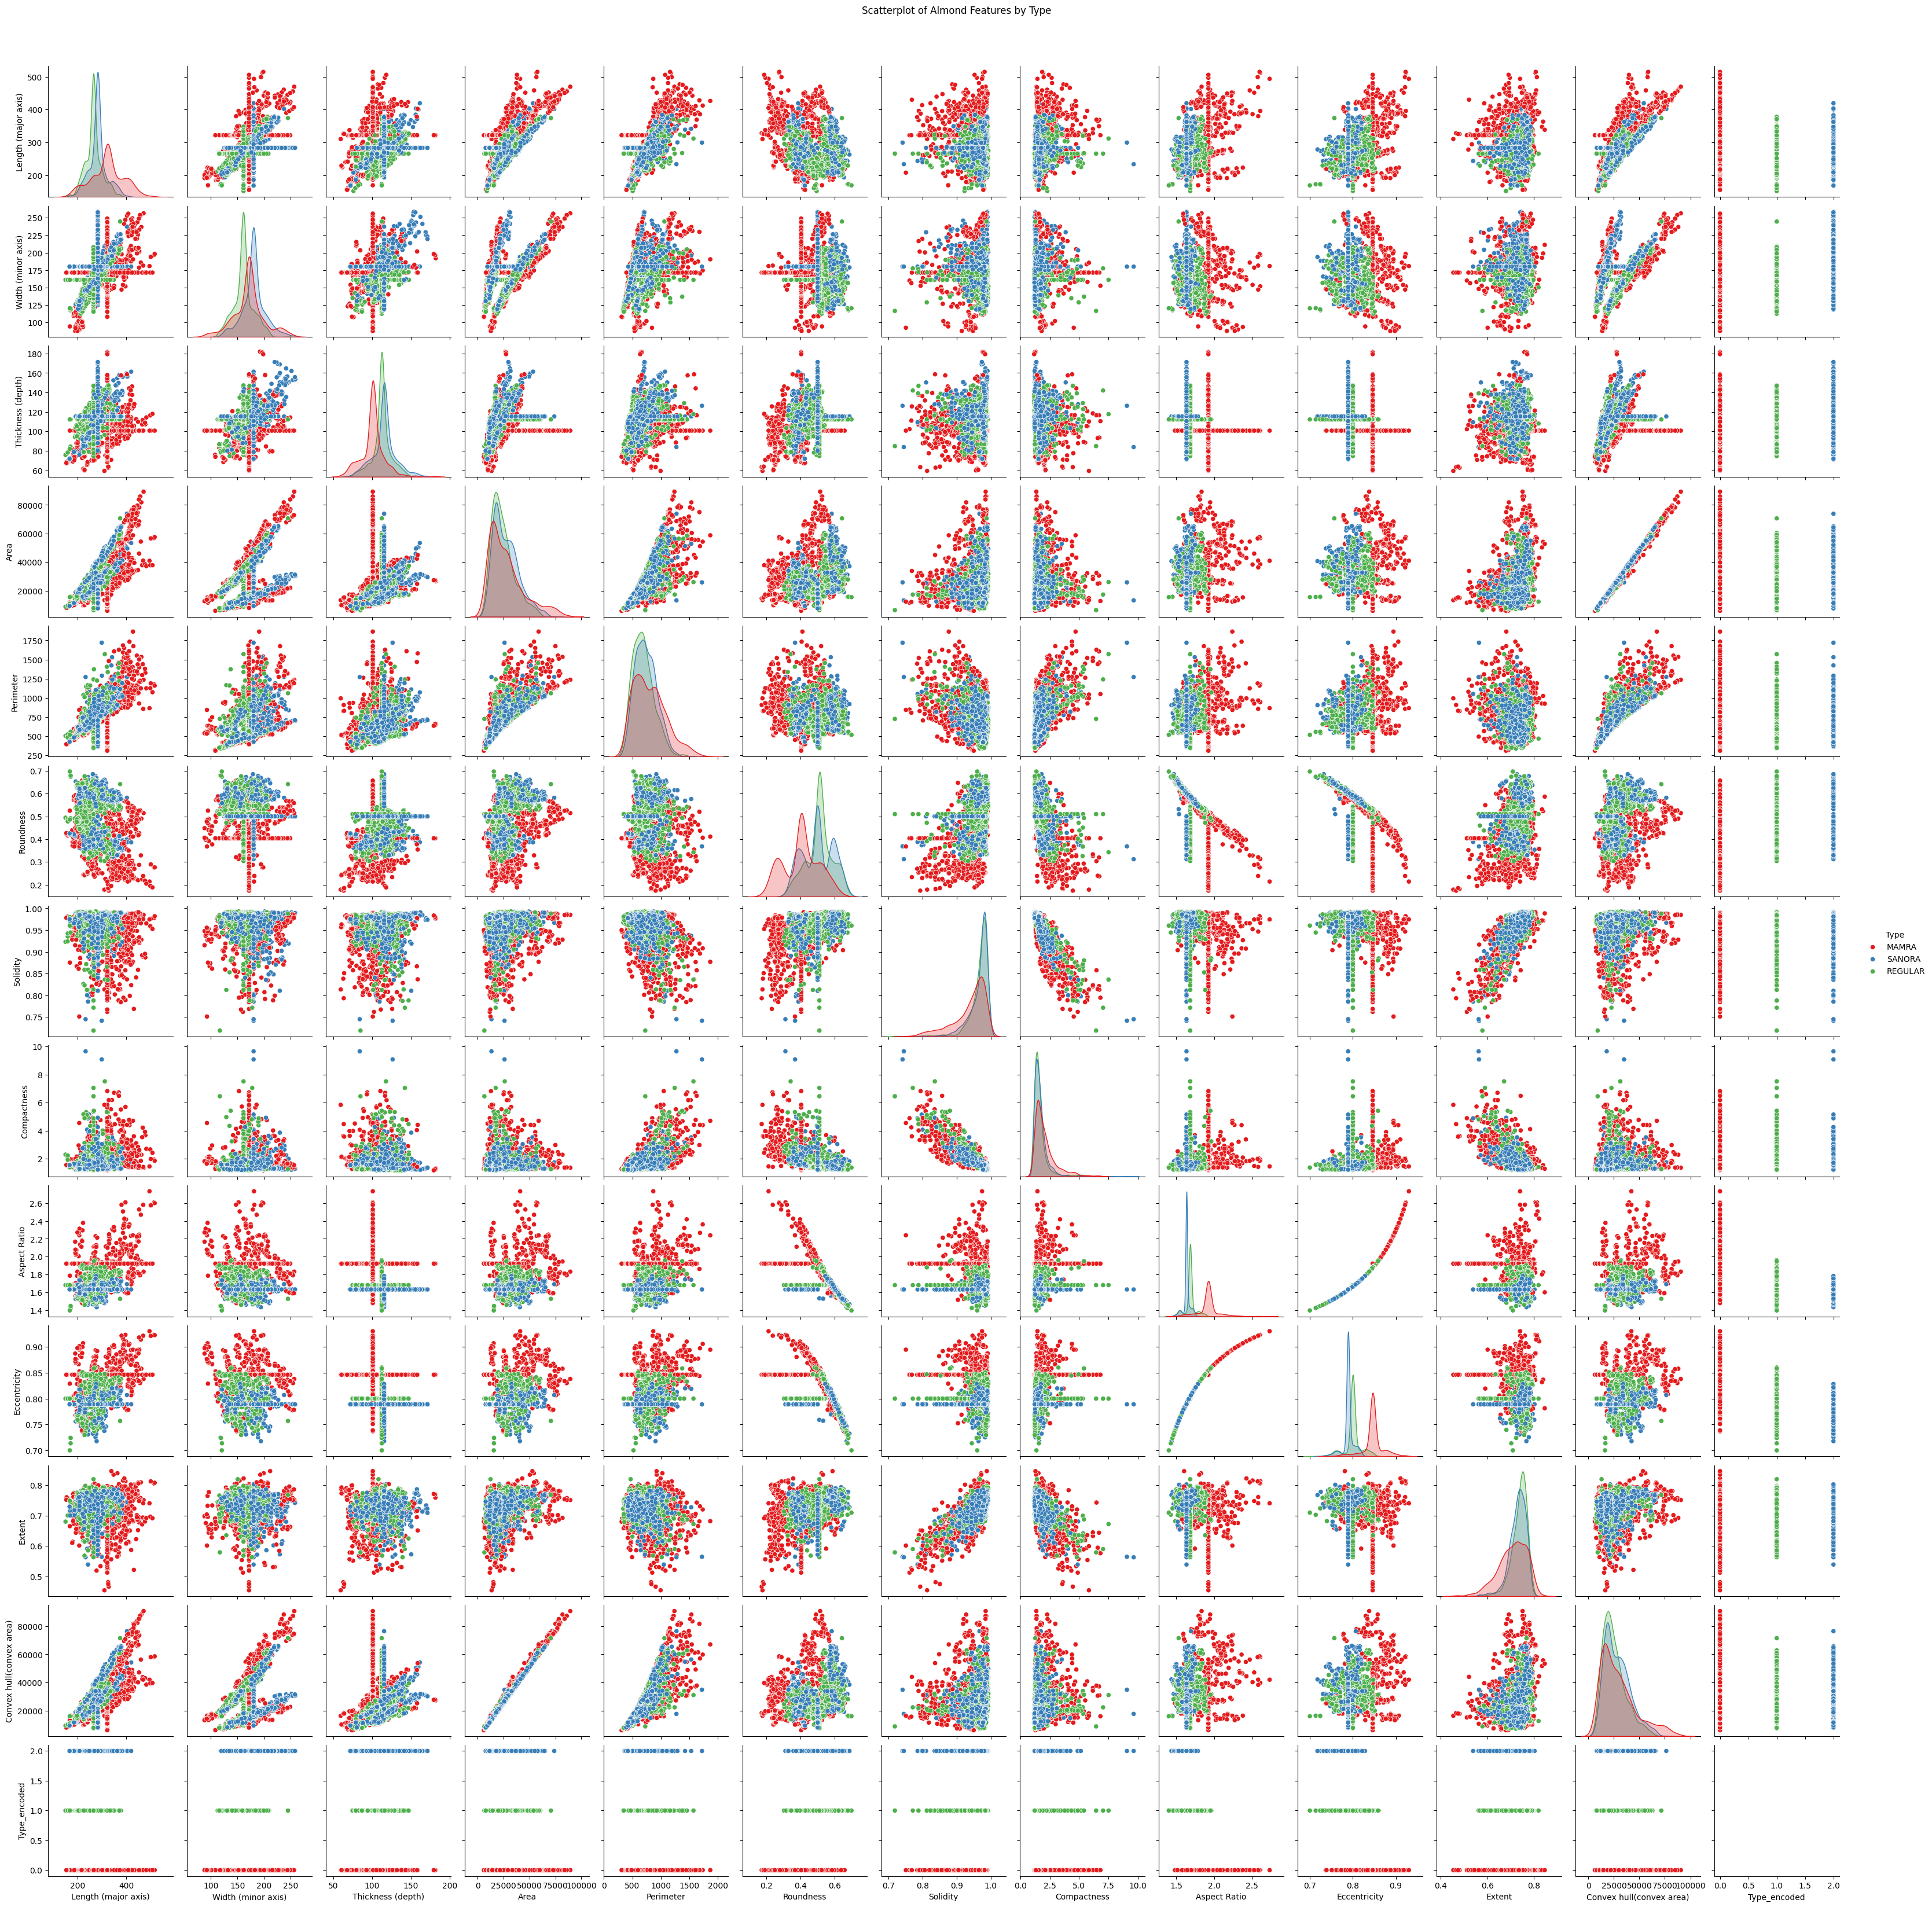

In [532]:
# scatter plot
sns.pairplot(df_filled, hue='Type', palette='Set1')
plt.suptitle('Scatterplot of Almond Features by Type', y=1.02)  # Add a title with spacing
plt.show()

In [533]:
# Feature Selection

# Aspect Ratio (0,1,2)
# Eccentricity (0,1,2)
# Roundness (0,2)
# Solidity (0)
# length(0,2)
# width(1,2)
# thickness (1,2)

columns_to_drop = [
    'Area', 'Perimeter', 'Compactness', 'Extent', 'Convex hull(convex area)'
]

df_filtered = df_filled.drop(columns=columns_to_drop)

# Display the first 10 rows of the filtered dataset
df_filtered.head(10)

Length (major axis)  Width (minor axis)  Thickness (depth)  Roundness  \
0           321.807244          227.940628         127.759132   0.403849   
1           321.807244          234.188126         128.199509   0.403849   
2           321.807244          229.418610         125.796547   0.403849   
3           321.807244          232.763153         125.918808   0.403849   
4           321.807244          230.150742         107.253448   0.403849   
5           321.807244          231.914429         107.759789   0.403849   
6           321.807244          226.371048         106.479408   0.403849   
7           321.807244          226.186142         102.623077   0.403849   
8           413.477173          171.563531         138.190536   0.309009   
9           418.210327          171.563531         129.659897   0.295783   

   Solidity  Aspect Ratio  Eccentricity   Type  Type_encoded  
0  0.973384      1.923085      0.846328  MAMRA             0  
1  0.957304      1.923085      0.846328  MAMRA             0  
2  0.967270      1.923085      0.846328  MAMRA             0  
3  0.965512      1.923085      0.846328  MAMRA             0  
4  0.951450      1.923085      0.846328  MAMRA             0  
5  0.957344      1.923085      0.846328  MAMRA             0  
6  0.956286      1.923085      0.846328  MAMRA             0  
7  0.968978      1.923085      0.846328  MAMRA             0  
8  0.950986      1.923085      0.846328  MAMRA             0  
9  0.955888      1.923085      0.846328  MAMRA             0

In [534]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [535]:
# split into train+validation (80%) and test set (20%)

X = df_filtered.drop(columns=['Type', 'Type_encoded']) 
y = df_filtered['Type_encoded']  # Target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training + Validation set size:", len(X_train_val))
print("Test set size:", len(X_test))

Training + Validation set size: 2242
Test set size: 561


In [536]:
import os
import random
import numpy as np
import tensorflow as tf

SEED = 49

def set_seed(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(SEED)  

def set_global_determinism(seed=SEED):
    set_seed(seed=seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_INTER_OP_PARALLELISM_THREADS'] = '1'
    os.environ['TF_INTRA_OP_PARALLELISM_THREADS'] = '1'

set_global_determinism(seed=SEED)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


In [537]:
%pip install scikeras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [538]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold

def create_model(optimizer='adam', learning_rate=0.001):
    #tf.random.set_seed(1)
    set_seed(SEED)
    
    model = Sequential()
    model.add(Input(shape=(7,)))
    # model.add(Dense(16, input_dim=7, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0, epochs=10)

param_grid = {
    'batch_size': [16, 32, 64],  
    'optimizer__learning_rate': [0.0001, 0.001, 0.01, 0.1]  
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, n_jobs=-1, verbose=1)
grid_result = grid.fit(X_train_val, y_train_val)

print(f"Best parameters: {grid_result.best_params_}")
print(f"Best cross-validation accuracy: {grid_result.best_score_:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'batch_size': 16, 'optimizer__learning_rate': 0.0001}
Best cross-validation accuracy: 0.5955


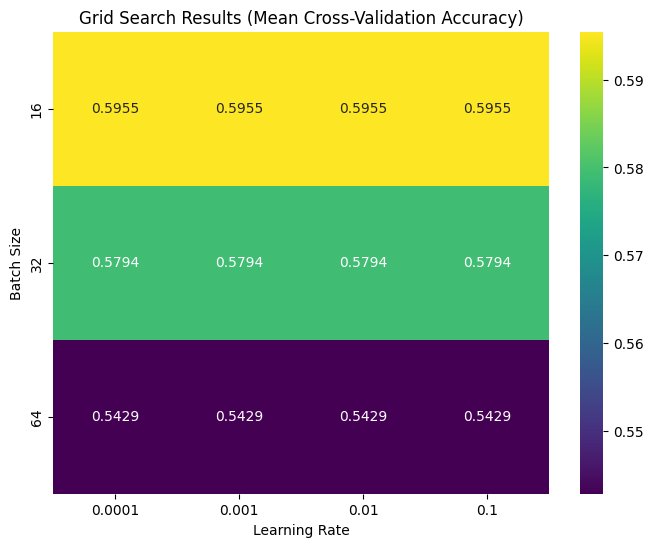

Pivot Table (Mean Cross-Validation Accuracy):
learning_rate    0.0001    0.0010    0.0100    0.1000
batch_size                                           
16             0.595457  0.595457  0.595457  0.595457
32             0.579430  0.579430  0.579430  0.579430
64             0.542862  0.542862  0.542862  0.542862


In [539]:
cv_results = grid_result.cv_results_

results_df = pd.DataFrame({
    'batch_size': cv_results['param_batch_size'].data,
    'learning_rate': cv_results['param_optimizer__learning_rate'].data,
    'mean_test_score': cv_results['mean_test_score']
})

pivot_table = results_df.pivot(index='batch_size', columns='learning_rate', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="viridis", fmt=".4f")
plt.title("Grid Search Results (Mean Cross-Validation Accuracy)")
plt.xlabel("Learning Rate")
plt.ylabel("Batch Size")
plt.show()

print("Pivot Table (Mean Cross-Validation Accuracy):")
print(pivot_table)


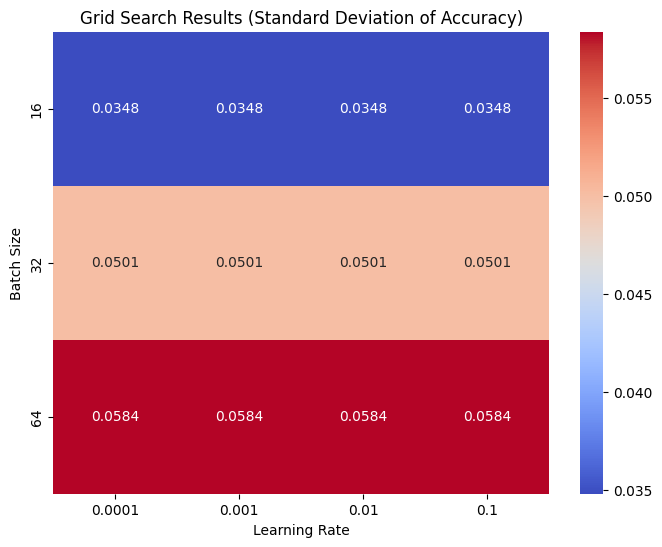

Pivot Table (Standard Deviation of Cross-Validation Accuracy):
learning_rate    0.0001    0.0010    0.0100    0.1000
batch_size                                           
16             0.034816  0.034816  0.034816  0.034816
32             0.050056  0.050056  0.050056  0.050056
64             0.058357  0.058357  0.058357  0.058357


In [540]:
results_df_std = pd.DataFrame({
    'batch_size': cv_results['param_batch_size'].data,
    'learning_rate': cv_results['param_optimizer__learning_rate'].data,
    'std_test_score': cv_results['std_test_score']
})

pivot_table_std = results_df_std.pivot(index='batch_size', columns='learning_rate', values='std_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_std, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Grid Search Results (Standard Deviation of Accuracy)")
plt.xlabel("Learning Rate")
plt.ylabel("Batch Size")
plt.show()

print("Pivot Table (Standard Deviation of Cross-Validation Accuracy):")
print(pivot_table_std)

In [541]:
mean_results_df = pd.DataFrame({
    'batch_size': cv_results['param_batch_size'].data,
    'learning_rate': cv_results['param_optimizer__learning_rate'].data,
    'mean_test_score': cv_results['mean_test_score']
})

std_results_df = pd.DataFrame({
    'batch_size': cv_results['param_batch_size'].data,
    'learning_rate': cv_results['param_optimizer__learning_rate'].data,
    'std_test_score': cv_results['std_test_score']
})

summary_df = pd.merge(mean_results_df, std_results_df, on=['batch_size', 'learning_rate'])

print("Summary of Hyperparameter Performance:")
print(summary_df)

summary_df.to_csv("hyperparameter_performance_summary.csv", index=False)

best_params = grid_result.best_params_
print(f"Best parameters from Grid Search: {best_params}")

Summary of Hyperparameter Performance:
    batch_size  learning_rate  mean_test_score  std_test_score
0           16         0.0001         0.595457        0.034816
1           16         0.0010         0.595457        0.034816
2           16         0.0100         0.595457        0.034816
3           16         0.1000         0.595457        0.034816
4           32         0.0001         0.579430        0.050056
5           32         0.0010         0.579430        0.050056
6           32         0.0100         0.579430        0.050056
7           32         0.1000         0.579430        0.050056
8           64         0.0001         0.542862        0.058357
9           64         0.0010         0.542862        0.058357
10          64         0.0100         0.542862        0.058357
11          64         0.1000         0.542862        0.058357
Best parameters from Grid Search: {'batch_size': 16, 'optimizer__learning_rate': 0.0001}


In [542]:
best_model = create_model(learning_rate=best_params['optimizer__learning_rate'])

history = best_model.fit(
    X_train_val, 
    y_train_val, 
    batch_size=best_params['batch_size'], 
    epochs=250,  # You can adjust the number of epochs as needed
    verbose=1
)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

best_model.save_weights('keras_model.weights.h5')

print(f"Test Set Accuracy: {test_accuracy * 100:.4f}" , "%")
print(f"Test Set Loss: {test_loss:.4f}")

Epoch 1/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4732 - loss: 2.0981
Epoch 2/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5381 - loss: 0.9894
Epoch 3/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 0.9166
Epoch 4/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5578 - loss: 0.9025
Epoch 5/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5639 - loss: 0.8811
Epoch 6/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5758 - loss: 0.8675
Epoch 7/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5772 - loss: 0.8582
Epoch 8/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5903 - loss: 0.8499
Epoch 9/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5943 - loss: 0.8481
Epoch 10/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5944 - loss: 0.8381
Epoch 11/250
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 0.8465
Epoch 12/250
141/141 ━━━━━━━━━━━━━━━━━━━━

In [543]:
# Model 2 : Resilient Backpropagation : RProp
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [544]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) 
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True 
    torch.backends.cudnn.benchmark = False

# Set the seed
set_seed(SEED)

X = df_filtered.drop(columns=['Type', 'Type_encoded'])  
y = df_filtered['Type_encoded']  

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training + Validation set size:", len(X_train_val))
print("Test set size:", len(X_test))

X_train_val = torch.tensor(X_train_val.to_numpy(), dtype=torch.float32)
y_train_val = torch.tensor(y_train_val.to_numpy(), dtype=torch.long)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long)


Training + Validation set size: 2242
Test set size: 561


In [545]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, hidden_size)
        self.fc6 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))        
        x = self.fc6(x)
        return x
    

learning_rates = [0.001, 0.01, 0.02]  
hidden_size = 128  
batch_sizes = [16, 32, 64]  
num_epochs = 10  


kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = np.zeros((len(learning_rates), len(batch_sizes))) 
std_results = np.zeros((len(learning_rates), len(batch_sizes)))

    

Results matrix (rows: learning rates, cols: batch size):
 [[0.58428552 0.59768136 0.606598  ]
 [0.59901368 0.59946608 0.61284899]
 [0.59636295 0.61463172 0.61775573]]
Standard Deviation matrix (rows: learning rates, cols: batch size):
 [[0.01752964 0.0084955  0.00594646]
 [0.01617389 0.0171142  0.00428321]
 [0.0233611  0.00993843 0.01037181]]


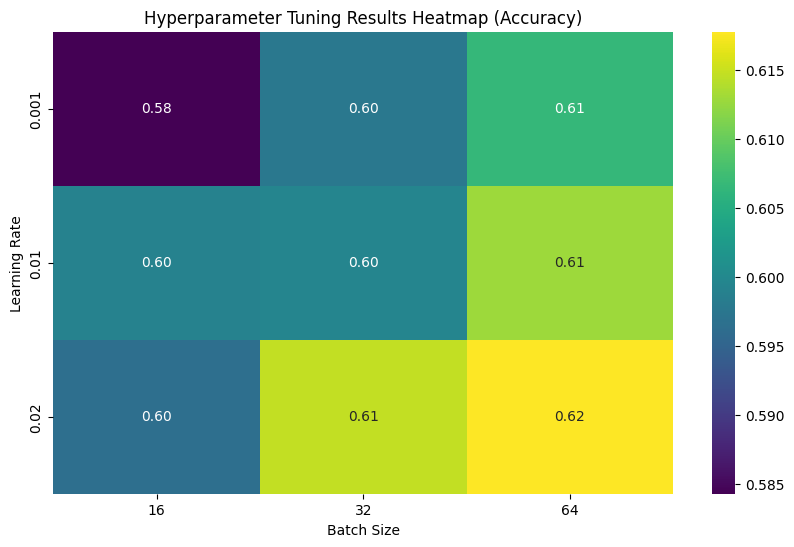

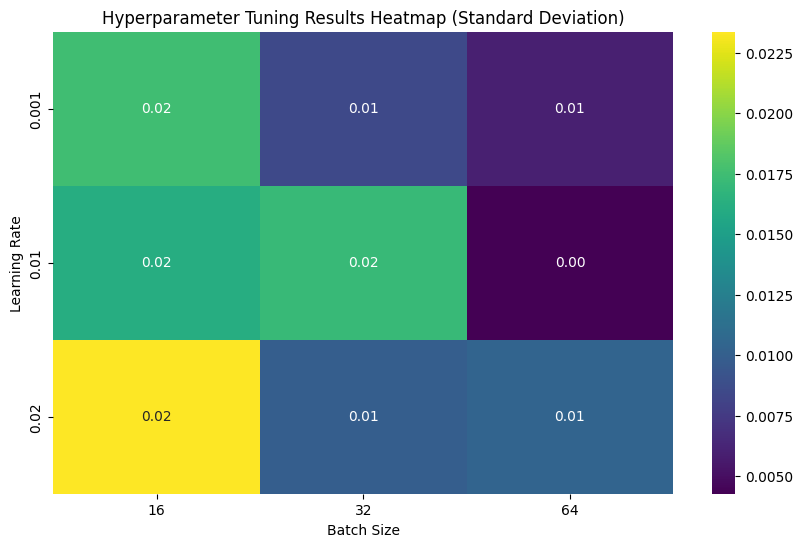

In [546]:
for i, lr in enumerate(learning_rates):
    for j, batch_size in enumerate(batch_sizes):
        fold_accuracies = []

        for fold, (train_index, val_index) in enumerate(kf.split(X_train_val)):
            X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
            y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]

            train_dataset = TensorDataset(X_train_fold, y_train_fold)
            val_dataset = TensorDataset(X_val_fold, y_val_fold)

            train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

            model = SimpleNN(input_size=7, hidden_size=hidden_size, output_size=3)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Rprop(model.parameters(), lr=lr)

            for epoch in range(num_epochs):
                model.train()
                running_loss = 0.0
                for X_batch, y_batch in train_loader:
                    optimizer.zero_grad()
                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()

            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    outputs = model(X_batch)
                    _, predicted = torch.max(outputs, 1)
                    total += y_batch.size(0)
                    correct += (predicted == y_batch).sum().item()

            accuracy = correct / total
            fold_accuracies.append(accuracy)

        avg_accuracy = np.mean(fold_accuracies)
        std_accuracy = np.std(fold_accuracies)
        results[i, j] = avg_accuracy
        std_results[i, j] = std_accuracy



print("Results matrix (rows: learning rates, cols: batch size):\n", results)
print("Standard Deviation matrix (rows: learning rates, cols: batch size):\n", std_results)


plt.figure(figsize=(10, 6))
sns.heatmap(results, annot=True, fmt=".2f", cmap='viridis', 
            xticklabels=batch_sizes, yticklabels=learning_rates)
plt.title('Hyperparameter Tuning Results Heatmap (Accuracy)')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(std_results, annot=True, fmt=".2f", cmap='viridis', 
            xticklabels=batch_sizes, yticklabels=learning_rates)
plt.title('Hyperparameter Tuning Results Heatmap (Standard Deviation)')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.show()

In [547]:
best_index = np.unravel_index(np.argmax(results, axis=None), results.shape)
best_lr = learning_rates[best_index[0]]
best_batch_size = batch_sizes[best_index[1]]

print(f'Best Learning Rate Model 2: {best_lr}, Best Batch Size: {best_batch_size}')

train_dataset = TensorDataset(X_train_val, y_train_val)
train_loader = DataLoader(dataset=train_dataset, batch_size=best_batch_size, shuffle=True)

Best Learning Rate Model 2: 0.02, Best Batch Size: 64


In [548]:
model = SimpleNN(input_size=7, hidden_size=hidden_size, output_size=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Rprop(model.parameters(), lr=best_lr)

num_epochs_final = 30 
for epoch in range(num_epochs_final):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch {epoch+1}/{num_epochs_final}, Loss: {running_loss/len(train_loader)}')

model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)

torch.save(model.state_dict(), 'pytorch_model_weights.pth')

print("PyTorch model weights saved successfully!")

print(f'Final Test Set Accuracy with Best Hyperparameters: {accuracy * 100:.2f}%')

Epoch 10/30, Loss: 0.8453580174181197
Epoch 20/30, Loss: 0.8600693709320493
Epoch 30/30, Loss: 0.8258433673116896
PyTorch model weights saved successfully!
Final Test Set Accuracy with Best Hyperparameters: 62.39%


In [549]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [550]:
# Model 3 : Hybrid Approach (Adam + RProp)

learning_rate_m1 = best_params['optimizer__learning_rate']
print(f"Best learning rate Model 1: {learning_rate_m1}")

print(f'Best Learning Rate Model 2: {best_lr}')



Best learning rate Model 1: 0.0001
Best Learning Rate Model 2: 0.02


In [551]:
set_seed(SEED)

def create_keras_model(learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(7,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


keras_model = create_keras_model(learning_rate=best_params['optimizer__learning_rate'])
keras_model.load_weights('keras_model.weights.h5')

pytorch_model = SimpleNN(input_size=7, hidden_size=128, output_size=3)
pytorch_model.load_state_dict(torch.load('pytorch_model_weights.pth'))

c:\Users\selgo\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\selgo\AppData\Local\Temp\ipykernel_19348\3513662167.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_gl

<All keys matched successfully>

In [552]:
keras_weights = keras_model.get_weights()

def set_pytorch_weights_from_keras(pytorch_model, keras_weights):
    with torch.no_grad():
        pytorch_model.fc1.weight.copy_(torch.tensor(keras_weights[0].T))
        pytorch_model.fc1.bias.copy_(torch.tensor(keras_weights[1]))
        pytorch_model.fc2.weight.copy_(torch.tensor(keras_weights[2].T))
        pytorch_model.fc2.bias.copy_(torch.tensor(keras_weights[3]))
        pytorch_model.fc3.weight.copy_(torch.tensor(keras_weights[4].T))
        pytorch_model.fc3.bias.copy_(torch.tensor(keras_weights[5]))
        pytorch_model.fc4.weight.copy_(torch.tensor(keras_weights[6].T))
        pytorch_model.fc4.bias.copy_(torch.tensor(keras_weights[7]))
        pytorch_model.fc5.weight.copy_(torch.tensor(keras_weights[8].T))
        pytorch_model.fc5.bias.copy_(torch.tensor(keras_weights[9]))
        pytorch_model.fc6.weight.copy_(torch.tensor(keras_weights[10].T))
        pytorch_model.fc6.bias.copy_(torch.tensor(keras_weights[11]))

# Apply the Keras weights to PyTorch
set_pytorch_weights_from_keras(pytorch_model, keras_weights)

In [553]:
def cosine_similarity(tensor1, tensor2):
    dot_product = torch.dot(tensor1.reshape(-1), tensor2.reshape(-1))  
    norm1 = torch.norm(tensor1.reshape(-1))
    norm2 = torch.norm(tensor2.reshape(-1))
    return dot_product / (norm1 * norm2)


def compute_weight_correlations(pytorch_model, keras_model):
    correlations = []
    keras_weights = keras_model.get_weights()
    pytorch_weights = list(pytorch_model.parameters())

    for pt_w, keras_w in zip(pytorch_weights, keras_weights):
        keras_w_tensor = torch.tensor(keras_w, dtype=torch.float32)
        
        if pt_w.shape != keras_w_tensor.shape and len(keras_w_tensor.shape) == 2:
            keras_w_tensor = keras_w_tensor.T

        similarity = cosine_similarity(pt_w, keras_w_tensor)
        correlations.append(similarity.item())
        
    return correlations

def weighted_average_updates(pytorch_model, keras_model, pytorch_performance, keras_performance):
    keras_weights = keras_model.get_weights()
    pytorch_weights = list(pytorch_model.parameters())

    total_performance = pytorch_performance + keras_performance
    pytorch_weight_contrib = pytorch_performance / total_performance
    keras_weight_contrib = keras_performance / total_performance

    averaged_weights = []
    for pt_w, keras_w in zip(pytorch_weights, keras_weights):
        keras_w_tensor = torch.tensor(keras_w, dtype=torch.float32)
        if pt_w.shape != keras_w_tensor.shape and len(keras_w_tensor.shape) == 2:
            keras_w_tensor = keras_w_tensor.T

        avg_w = pytorch_weight_contrib * pt_w + keras_weight_contrib * keras_w_tensor
        averaged_weights.append(avg_w)

    return averaged_weights

def assign_averaged_weights_to_pytorch(pytorch_model, averaged_weights):
    with torch.no_grad():
        for param, avg_weight in zip(pytorch_model.parameters(), averaged_weights):
            param.copy_(avg_weight)




In [554]:

pytorch_performance = test_accuracy
keras_performance = accuracy    

print("accurracy m1: ", test_accuracy)
print("accurracy m2: ", accuracy)

averaged_weights = weighted_average_updates(pytorch_model, keras_model, pytorch_performance, keras_performance)

assign_averaged_weights_to_pytorch(pytorch_model, averaged_weights)

correlations = compute_weight_correlations(pytorch_model, keras_model)
print("Cosine Similarities between corresponding weights: ", correlations)

accurracy m1:  0.8253119587898254
accurracy m2:  0.6238859180035651
Cosine Similarities between corresponding weights:  [1.0, 1.0, 0.6156440377235413, 1.0, 0.6140164136886597, 1.000000238418579, 0.6057610511779785, 1.0, 0.611068606376648, 1.0, 0.9999998807907104, 1.0000001192092896]


Learning rates for grid search: [1e-05]
Results matrix (rows: learning rates, cols: batch size):
 [[0.58384406 0.59723791 0.61106328]]
Standard Deviation matrix (rows: learning rates, cols: batch size):
 [[0.01463101 0.00377581 0.01127103]]


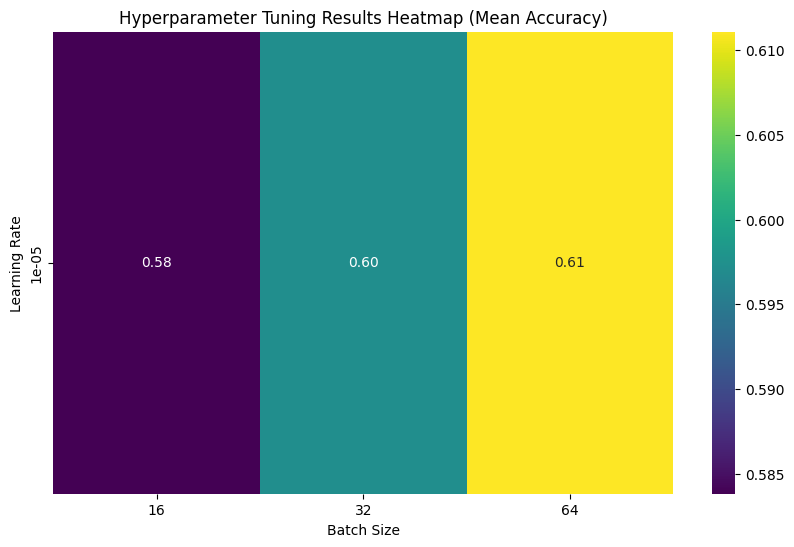

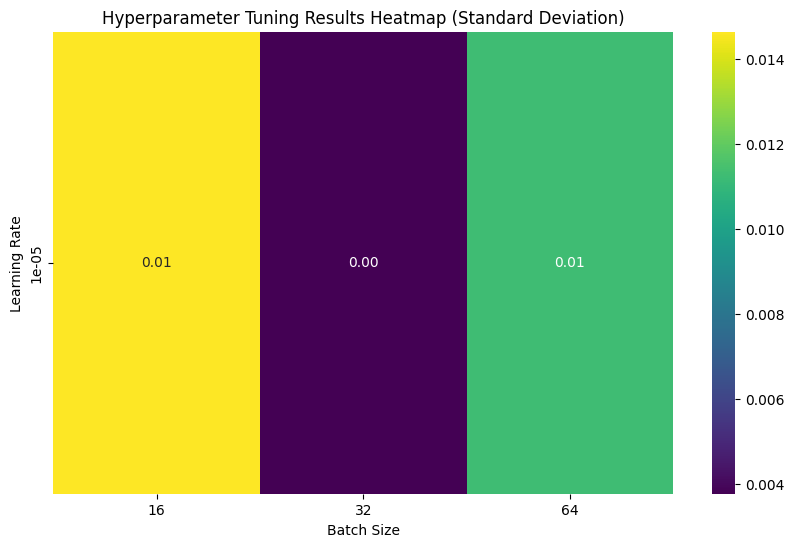

In [555]:
from itertools import product

batch_sizes = [16, 32, 64]
# learning_rates = [learning_rate_m1, best_lr , 0.00001] 
learning_rates = [0.00001]  

print("Learning rates for grid search:", learning_rates)



num_epochs = 10  

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = np.zeros((len(learning_rates), len(batch_sizes))) 
std_results = np.zeros((len(learning_rates), len(batch_sizes)))

for i, lr in enumerate(learning_rates):
    for j, batch_size in enumerate(batch_sizes):
        fold_accuracies = []

        for fold, (train_index, val_index) in enumerate(kf.split(X_train_val)):
            X_train_fold, X_val_fold = X_train_val[train_index], X_train_val[val_index]
            y_train_fold, y_val_fold = y_train_val[train_index], y_train_val[val_index]

            train_dataset = TensorDataset(X_train_fold, y_train_fold)
            val_dataset = TensorDataset(X_val_fold, y_val_fold)

            train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

            model = SimpleNN(input_size=7, hidden_size=hidden_size, output_size=3)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Rprop(model.parameters(), lr=lr)

            for epoch in range(num_epochs):
                model.train()
                running_loss = 0.0
                for X_batch, y_batch in train_loader:
                    optimizer.zero_grad()
                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()

            model.eval()
            correct = 0
            total = 0
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    outputs = model(X_batch)
                    _, predicted = torch.max(outputs, 1)
                    total += y_batch.size(0)
                    correct += (predicted == y_batch).sum().item()

            accuracy = correct / total
            fold_accuracies.append(accuracy)

        avg_accuracy = np.mean(fold_accuracies)
        std_accuracy = np.std(fold_accuracies)
        results[i, j] = avg_accuracy
        std_results[i, j] = std_accuracy


print("Results matrix (rows: learning rates, cols: batch size):\n", results)
print("Standard Deviation matrix (rows: learning rates, cols: batch size):\n", std_results)

plt.figure(figsize=(10, 6))
sns.heatmap(results, annot=True, fmt=".2f", cmap='viridis', 
            xticklabels=batch_sizes, yticklabels=learning_rates)
plt.title('Hyperparameter Tuning Results Heatmap (Mean Accuracy)')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(std_results, annot=True, fmt=".2f", cmap='viridis', 
            xticklabels=batch_sizes, yticklabels=learning_rates)
plt.title('Hyperparameter Tuning Results Heatmap (Standard Deviation)')
plt.xlabel('Batch Size')
plt.ylabel('Learning Rate')
plt.show()


In [556]:

best_index = np.unravel_index(np.argmax(results, axis=None), results.shape)
best_lr = learning_rates[best_index[0]]
best_batch_size = batch_sizes[best_index[1]]

print(f'Best Learning Rate : {best_lr}, Best Batch Size: {best_batch_size}')



Best Learning Rate : 1e-05, Best Batch Size: 64


In [557]:
# optimizer = optim.Rprop(pytorch_model.parameters(), lr=0.00001)
optimizer = optim.Rprop(pytorch_model.parameters(), lr=best_lr)
criterion = nn.CrossEntropyLoss()

num_finetune_epochs =200  

for epoch in range(num_finetune_epochs):
    pytorch_model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader: 
        optimizer.zero_grad()
        outputs = pytorch_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_finetune_epochs}, Loss: {running_loss/len(train_loader)}')


pytorch_model.eval()  

correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for X_batch, y_batch in train_loader:  
        outputs = pytorch_model(X_batch)  
        
        _, predicted_labels = torch.max(outputs, 1)
        
        correct_predictions += (predicted_labels == y_batch).sum().item()
        
        total_samples += y_batch.size(0)

print(f"Test Set Accuracy Adam: {test_accuracy * 100:.4f}" , "%")
print(f'Final Test Set Accuracy Rprop: {accuracy * 100:.2f}%')

test_accuracy = correct_predictions / total_samples * 100  # Convert to percentage
print(f'Final Trest Set Accuracy: {test_accuracy:.2f}%')

Epoch 1/200, Loss: 3.549724295221526
Epoch 2/200, Loss: 1.0303612104777633
Epoch 3/200, Loss: 0.7026108785949904
Epoch 4/200, Loss: 0.7528318105072811
Epoch 5/200, Loss: 0.7757622239918545
Epoch 6/200, Loss: 1.5222510397434235
Epoch 7/200, Loss: 2.3058728061873337
Epoch 8/200, Loss: 3.0790225647646805
Epoch 9/200, Loss: 3.516705708257083
Epoch 10/200, Loss: 3.9083581803173852
Epoch 11/200, Loss: 3.9855640294223
Epoch 12/200, Loss: 3.913384455031362
Epoch 13/200, Loss: 3.8864719220276536
Epoch 14/200, Loss: 3.773758038364608
Epoch 15/200, Loss: 3.642488459574765
Epoch 16/200, Loss: 3.6930711033015418
Epoch 17/200, Loss: 3.631183093991773
Epoch 18/200, Loss: 3.3527976233383705
Epoch 19/200, Loss: 3.250632497771033
Epoch 20/200, Loss: 3.199827513818083
Epoch 21/200, Loss: 3.175173466575557
Epoch 22/200, Loss: 3.2191809187161513
Epoch 23/200, Loss: 3.1760576912041367
Epoch 24/200, Loss: 3.23503986206548
Epoch 25/200, Loss: 3.379738822356589
Epoch 26/200, Loss: 3.3136103636231917
Epoch 27/2